# **i. Introduction**

Milestone 2

Nama : Rivaldi Valensia

Batch : HCK-007

Link Huggingface : https://huggingface.co/spaces/Rivaldi/bank_customer_churn_prediction

# **ii. Import Libraries**

Bagian ini untuk mengimport library yang akan digunakan

In [1]:
# Data Exploration
import pandas as pd

#Data Calculation
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Feature Engineering
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from phik import phik_matrix
from imblearn.under_sampling import RandomUnderSampler

# Modelling 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Model Evaluation
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix, recall_score, roc_auc_score, roc_curve, precision_score, f1_score

#Hyperparameter Tuning 
from sklearn.model_selection import RandomizedSearchCV

#Model Saving
import pickle

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")


# **iii. Data Loading**

Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut.

In [2]:
# Import CSV
data_raw = pd.read_csv('/Users/valdi/Desktop/Milestone 2/deployment/data.csv')

# Show result
data_raw

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Dataset yang telah diubah menjadi csv lalu di import menggunakan library pandas dan dijadikan suatu dataframe berbentuk tabel

# **iv. Exploratory Data Analysis (EDA)**

Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

## A. Problem Overview

Problem Definition : 
Customer churn adalah hilangnya pelanggan yang berpindah dari satu sektor ke pesaing lain dalam waktu tertentu. Industri perbankan yang termasuk kedalam sektor financial tentu menghadapi tantangan mengenai permasalahan churn ini. Customer churn ini tentu saja meresahkan apabila tidak ditangani karena akan beresiko dalam penurunan revenue perusahaan. Data customer bank yang berjumlah besar dapat dimanfaatkan untuk membangun model prediksi customer churn dengan menggunakan machine learning. Model prediksi yang dibangun dapat digunakan untuk strategi pelanggan guna meningkatkan customer retention.

Objectives :
- Mengurangi tingkat customer churn
- Membuat model prediksi
- Menganalisis ciri-ciri kemungkinan customer yang akan churn
- Mengukur kinerja model

## B. Data Understanding

Langkah ini dilakukan guna memahami data dan pengecekan pola yang ada pada dataframe seperti pengecekan nama dan jumlah kolom, pengecekan missing value, pengecekan data duplikat dan lain-lain

In [3]:
# Show top 10 data of dataset
data_raw.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


Menampilkan 10 data teratas sesuai index dari dataframe

In [4]:
# Show latest 10 data of dataset
data_raw.tail(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9990,15798964,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,15769959,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,15657105,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,15569266,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,15719294,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


Menampilkan 10 data terakhir sesuai index dari dataframe

In [5]:
#Show basic information
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Menampilkan informasi dasar mengenai dataframe seperti nama kolom, tipe data dan lain-lain

In [6]:
# Show shape of dataframe
data_raw.shape

(10000, 12)

Menampilkan ukuran tabel yang mempunyai 10000 baris dan 12 kolom

In [7]:
# Show name of all columns
data_raw.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

Menampilkan nama kolom secara keseluruhan

**Keterangan nama kolom pada dataframe |**

| Nama Kolom                  | Keterangan                                                                   |
| --------------------------- | ---------------------------------------------------------------------------- |
| customer_id | Nomor identifikasi unik untuk setiap pelanggan |
| credit_score | Skor kredit pelanggan, yang mengindikasikan seberapa baik pelanggan memiliki catatan kredit |
| country | Negara tempat pelanggan tinggal atau terdaftar|
| gender | Jenis kelamin pelanggan (misalnya, pria atau wanita)|
| age | Usia nasabah |
| tenure | Jumlah tahun pelanggan telah menjadi nasabah bank|
| balance | Saldo akun pelanggan di bank|
| products_number | Jumlah produk atau layanan yang dimiliki oleh pelanggan di bank|
| credit_card | Indikator apakah pelanggan memiliki kartu kredit (ya/tidak)|
| active_member | Indikator apakah pelanggan adalah anggota aktif bank (ya/tidak)|
| estimated_salary | Estimasi gaji tahunan pelanggan|
| churn | Variabel target yang menunjukkan apakah pelanggan telah melakukan churn (pindah dari bank) atau tidak (0 untuk tidak churn, 1 untuk churn)|

In [8]:
# # Selects numeric columns
numeric = data_raw.select_dtypes(include=['int64', 'float64']).columns

# Selects categorical columns
object = data_raw.select_dtypes(include=['object']).columns

Membagi dataframe berdasarkan tipe data pada kolomnya nya yaitu numerical dan categorical

In [9]:
# Define variable
num = numeric.shape[0]

# Showing number of columns with numeric data type
print(f"Jumlah kolom yang bertipe data numerikal adalah :", num, "kolom", "\n","\n", numeric)

Jumlah kolom yang bertipe data numerikal adalah : 10 kolom 
 
 Index(['customer_id', 'credit_score', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')


Menampilkan jumlah kolom dan nama kolom secara keseluruhan yang bertipe data numerical

In [10]:
# Define variable
obj = object.shape[0]

# Showing number of columns with numeric data type
print(f"Jumlah kolom yang bertipe data object adalah :",obj, "kolom", "\n","\n",object)

Jumlah kolom yang bertipe data object adalah : 2 kolom 
 
 Index(['country', 'gender'], dtype='object')


Menampilkan jumlah kolom dan nama kolom secara keseluruhan yang bertipe data categorical.

In [11]:
# Check duplicate rows
data_raw.duplicated().sum()

0

Mengecek jumlah data yang terduplikasi pada dataframe. Tidak ada data duplikat

In [12]:
# Check missing value
data_raw.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

Tidak ada missing value

In [13]:
# Showing descriptive statistics for numeric columns
data_raw[numeric].describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
products_number,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


Mengecek ringkasan statistik seperti nilai rata-rata, nilai minimum dan maksimum pada data yang bertipe numerical

In [14]:
# Returns the number of unique values ​​in each column of data_raw
data_raw.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

Menampilkan jumlah unik value yang ada di setiap kolom.

Kolom products_number, credit_card, active_member dan churn walaupun bertipe data numerical tetapi mempunyai sedikit unique values, maka kolom-kolom tersebut dianggap bertipe categorical karena tidak continues values.

## C. Data Cleaning

Pada langkah ini akan dilakukan pembersihan data, guna menyiapkan data agar dapat digunakan untuk membuat model klasifikasi. Langkah yang akan dilakukan pada data cleaning seperti penghapusan kolom yang tidak terpakai.


### 1. Drop columns

In [15]:
# Remove the customer_id column from dataframe
data_drop_cols = data_raw.drop(columns=['customer_id'])

# Show dataframe
data_drop_cols


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Saya menghilangkan kolom customer_id karena tidak ada hubungannya dengan customer churn setelah itu membuat variabel baru untuk menyimpan hasil setelah menghapus kolom tersebut

### 2. Dataframe after data cleaning

In [16]:
# Define variable for new dataframe
data_clean = data_drop_cols
data_clean

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Setelah data clean dilakukan, saya membuat dataframe baru untuk menyimpan hasil dari proses cleaning data tersebut

## D. Data Visualization

### PLOT 1

#### Distribution Churn

Churn: 2037
Retention: 7963


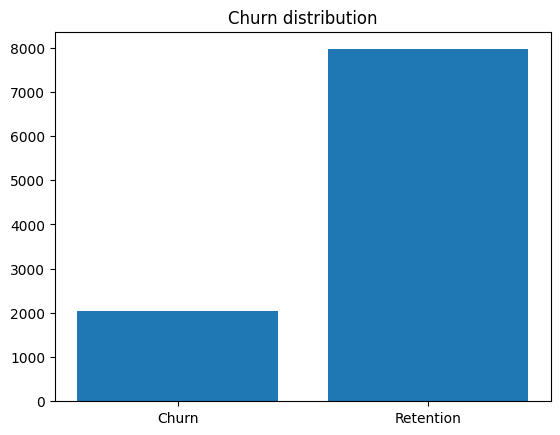

In [17]:
# Plot 1
plt.bar(['Churn', 'Retention'], [data_clean['churn'].sum(), data_clean['churn'].shape[0]-data_clean['churn'].sum().sum()])
plt.title('Churn distribution')
print("Churn:",data_clean['churn'].sum())
print("Retention:",data_clean['churn'].shape[0]-data_clean['churn'].sum().sum())

Terlihat bahwa customer retention lebih tinggi daripada customer churn. Namun tidak menutup kemungkinan bahwa kedepannya customer churn akan melebihi customer retention. Maka dari itu, kita akan melakukan visualisasi untuk menemukan pola apa yang berhubungan dari kolom-kolom yang ada dan mungkin saja menjadi alasan seorang customer untuk churn

### PLOT 2

#### Distribution Churn by Country

<Axes: title={'center': 'Countries'}>

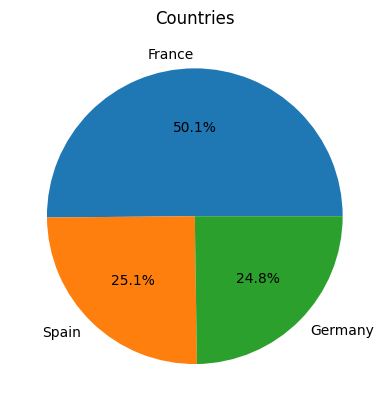

In [18]:
# Plot 2
pd.crosstab(index=data_clean['country'],columns='count',normalize=True).plot(
    kind='pie',autopct='%.1f%%',y='count',
    labels=data_clean['country'].unique(),
    ylabel='',title='Countries',legend=False)

Negara yang memiliki persentase tertinggi untuk customer churn adalah France dengan nilai 50%. Maka dari itu, saya ingin melakukan analisis berdasarkan visualisasi data yang berfokus pada negara France

### PLOT 3

#### Distribution Churn by Gender in France

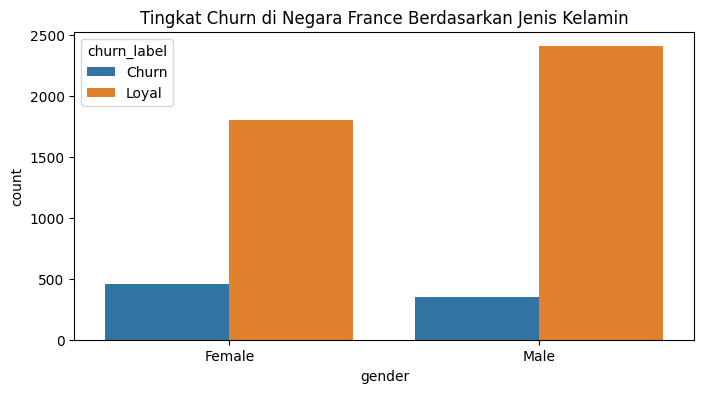

In [19]:
# Plot 3
data_france = data_clean[data_clean['country'] == 'France']
data_france['churn_label'] = data_france['churn'].map({0: 'Loyal', 1: 'Churn'})
plt.figure(figsize=(8, 4))
sns.countplot(x='gender', hue='churn_label', data=data_france)
plt.title('Tingkat Churn di Negara France Berdasarkan Jenis Kelamin')
plt.show()

Di negara France, untuk tingkat customer churn tertinggi ada pada gender Female. Dan tingkat customer loyal tertinggi ada pada gender Male.

### PLOT 4

#### Distribution Churn by Age in France

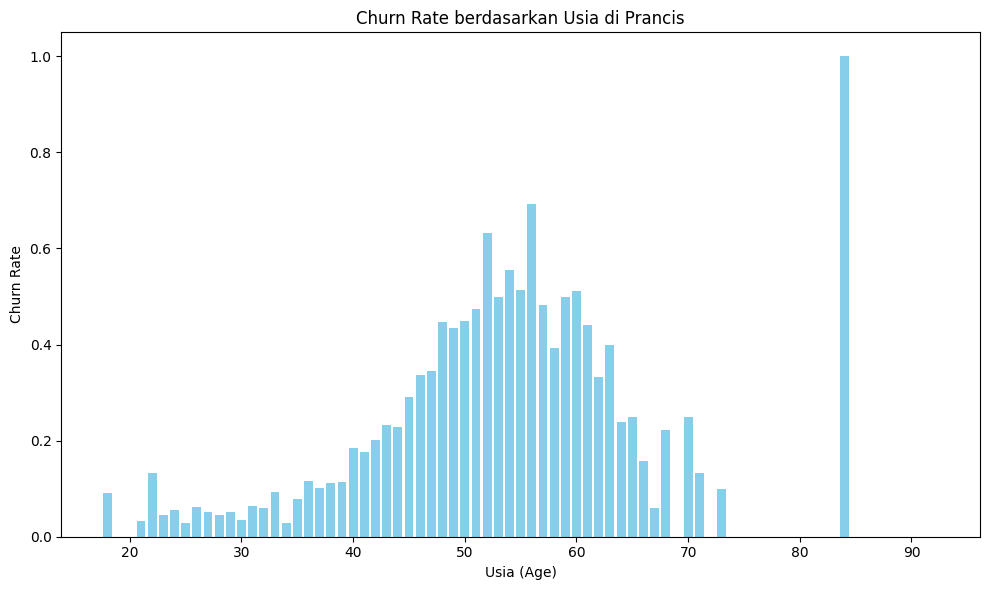

In [20]:
# Plot 4
data_france = data_clean[data_clean['country'] == 'France']
churn_by_age = data_france.groupby('age')['churn'].mean()
plt.figure(figsize=(10, 6))
plt.bar(churn_by_age.index, churn_by_age.values, color='skyblue')
plt.xlabel('Usia (Age)')
plt.ylabel('Churn Rate')
plt.title('Churn Rate berdasarkan Usia di Prancis')
plt.tight_layout()
plt.show()

Pada umur 40 tahun keatas, tingkat churn pada customer meningkat

### PLOT 5

#### Distribution Churn by Product Number in France

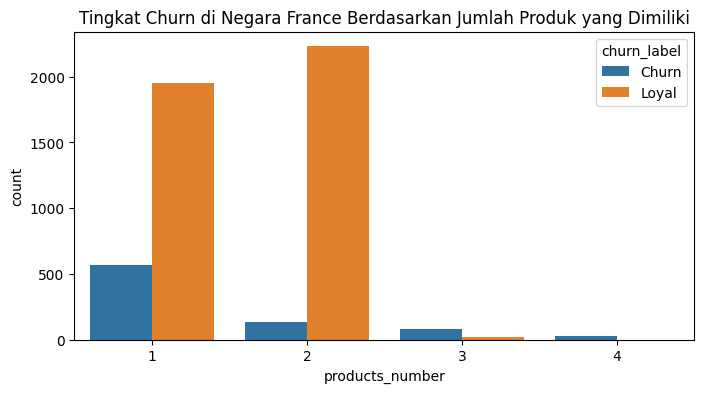

In [21]:
# Plot 5
data_france = data_clean[data_clean['country'] == 'France']
data_france['churn_label'] = data_france['churn'].map({0: 'Loyal', 1: 'Churn'})
plt.figure(figsize=(8, 4))
sns.countplot(x='products_number', hue='churn_label', data=data_france)
plt.title('Tingkat Churn di Negara France Berdasarkan Jumlah Produk yang Dimiliki')
plt.show()

Produk nomor 4 adalah produk yang sepi peminat. Produk 2 adalah produk yang berpotensi meningkatkan retention customer atau keloyalan customer sedangkan produk nomor 1 adalah produk yang berpotensi terhadap tingkat churn pada customer.

### PLOT 6

#### Distribution Churn by Active Member in France

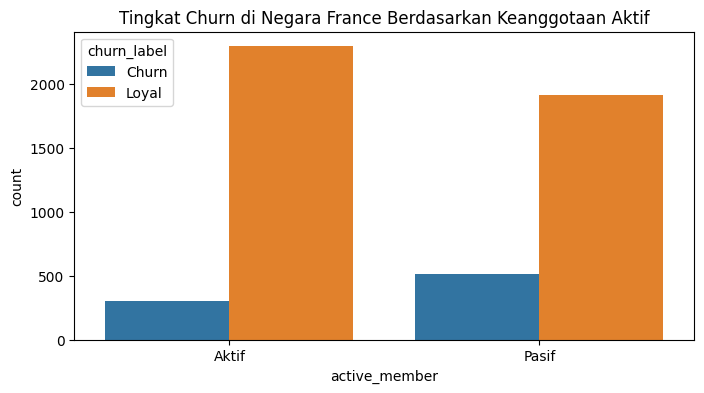

In [22]:
# Plot 6
data_france = data_clean[data_clean['country'] == 'France']
data_france['churn_label'] = data_france['churn'].map({0: 'Loyal', 1: 'Churn'})
data_france['active_member'] = data_france['active_member'].map({0: 'Pasif', 1: 'Aktif'})

plt.figure(figsize=(8, 4))
sns.countplot(x='active_member', hue='churn_label', data=data_france)
plt.title('Tingkat Churn di Negara France Berdasarkan Keanggotaan Aktif')
plt.show()

Tingkat churn disebabkan juga oleh customer yang pasif untuk menggunakan layanan, karena customer tersebut pasif maka memperbesar peluang untuk churn atau keluar dari status nasabah nya.

### PLOT 7

#### Distribution Churn by Mean Balance in France

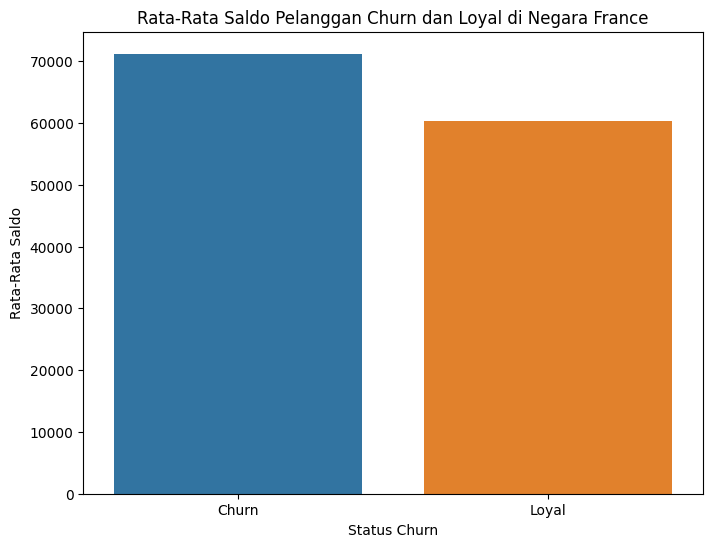

In [23]:
# Plot 7
data_france = data_clean[data_clean['country'] == 'France']
data_france['churn_label'] = data_france['churn'].map({0: 'Loyal', 1: 'Churn'})
mean_balance = data_france.groupby('churn_label')['balance'].mean().reset_index()
mean_balance

plt.figure(figsize=(8, 6))
sns.barplot(x='churn_label', y='balance', data=mean_balance)
plt.title('Rata-Rata Saldo Pelanggan Churn dan Loyal di Negara France')
plt.xlabel('Status Churn')
plt.ylabel('Rata-Rata Saldo')
plt.show()

Rata-rata saldo pada customer churn lebih tinggi dibandingkan customer yang loyal. Maka dari itu, kita sebagai pihak bank wajib untuk mengurangi tingkat churn customer, karena apabila tingkat churn semakin tinggi maka semakin besar atau timpang rata-rata saldo customer churn dibandingkan customer loyal dan hal itu dapat menyebabkan bank merugi.

### PLOT 8

#### Distribution Churn by Credit Card in France

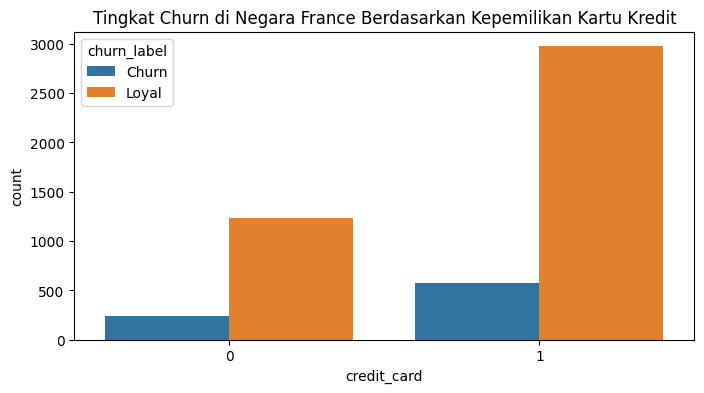

In [24]:
# Plot 8
data_france = data_clean[data_clean['country'] == 'France']
data_france['churn_label'] = data_france['churn'].map({0: 'Loyal', 1: 'Churn'})

plt.figure(figsize=(8, 4))
sns.countplot(x='credit_card', hue='churn_label', data=data_france)
plt.title('Tingkat Churn di Negara France Berdasarkan Kepemilikan Kartu Kredit')
plt.show()

Customer yang mempunyai kartu kredit mayoritas adalah customer loyal dan customer yang churn juga. Hanya ada sedikit customer yang tidak mempunyai kartu kredit, karena mayoritas customer sudah mempunyai kartu kredit

# **v. Feature Engineering**

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## A. Divide data into categories values and numeric values

Langkah memisahkan data kategori dan data numerik agar dapat mengidentifikasi pola, tren, dan hubungan dalam data dengan lebih baik, yang selanjutnya akan membantu Anda membuat keputusan yang lebih baik dan membangun model yang lebih akurat. Memang, data dalam kolom bertipe integer, namun ada beberapa kolom yang memiliki unique values sedikit dan bisa dikatakan sebagai categories values

In [25]:
#Divide category columns into category_columns
category_columns = data_clean[['country', 'gender', 'products_number', 'credit_card', 'active_member', 'churn']]

# Divide numeric columns into numeric_columns
numeric_columns = data_clean[['credit_score', 'age', 'tenure','balance']]

In [26]:
# Show dataframe
category_columns

,country,gender,products_number,credit_card,active_member,churn
0,France,Female,1,1,1,1
1,Spain,Female,1,0,1,0
2,France,Female,3,1,0,1
3,France,Female,2,0,0,0
4,Spain,Female,1,1,1,0
...,...,...,...,...,...,...
9995,France,Male,2,1,0,0
9996,France,Male,1,1,1,0
9997,France,Female,1,0,1,1
9998,Germany,Male,2,1,0,1


Menampilkan dataframe yang berisi kolom-kolom bertipe categorical

In [27]:
# Show dataframe
numeric_columns

,credit_score,age,tenure,balance
0,619,42,2,0.00
1,608,41,1,83807.86
2,502,42,8,159660.80
3,699,39,1,0.00
4,850,43,2,125510.82
...,...,...,...,...
9995,771,39,5,0.00
9996,516,35,10,57369.61
9997,709,36,7,0.00
9998,772,42,3,75075.31


Menampilkan dataframe yang berisi kolom-kolom bertipe numerical

## B. VIF

Langkah VIF (Variance Inflation Factor) digunakan untuk mengevaluasi tingkat multicollinearity (multikolinearitas) antara variabel-variabel independen dalam sebuah model

In [28]:
# Select the independent variables for which you want to calculate VIF
X = numeric_columns

# Add a constant column to calculate VIF with an intercept (constant)
X['intercept'] = 1

# Initialize a dataframe to store the VIF results
vif_data = pd.DataFrame()
vif_data["Name Column"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Filter the VIF results to remove the intercept column
vif_data = vif_data[vif_data["Name Column"] != "intercept"]

# Show dataframe
vif_data

,Name Column,VIF
0,credit_score,1.000057
1,age,1.000912
2,tenure,1.000244
3,balance,1.000986


Terlihat nilai VIF pada 4 kolom tersebut rendah, berarti tidak ada multicollinearity pada kolom tersebut

## C. Cardinality

Langkah ini dilakukan untuk mengukur jumlah nilai unik pada masing-masing kolom yang bertipe categorical

In [29]:
# Loop through the columns in list_category_columns
for col in category_columns:
    cardinality = data_clean[col].nunique()
    print(f"Cardinality kolom {col}: {cardinality} unique values")

Cardinality kolom country: 3 unique values
Cardinality kolom gender: 2 unique values
Cardinality kolom products_number: 4 unique values
Cardinality kolom credit_card: 2 unique values
Cardinality kolom active_member: 2 unique values
Cardinality kolom churn: 2 unique values


Unique values pada beberapa kolom tersebut masih sedikit maka tidak perlu handling cardinality

## D. Heatmap Correlation

Langkah ini dilakukan guna mencari hubungan korelasi antar kolom

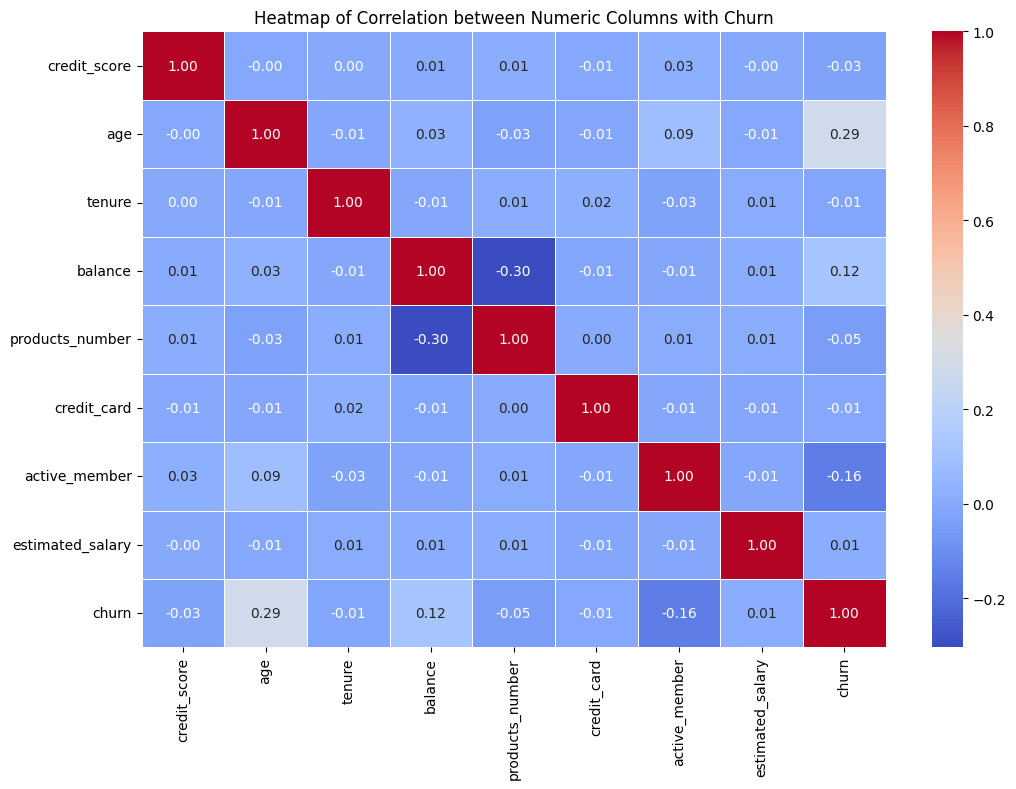

In [30]:
# Calculate the correlation matrix between numeric columns
correlation_matrix = data_clean.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Heatmap of Correlation between Numeric Columns with Churn")
plt.show()

Hanya ada 3 kolom yang melewati threshold >0.1 atau <= -.01 yaitu kolom active_member, balance dan age. Sebenarnya kita bisa langsung menyeleksi kolom apa saja yang mempunyai korelasi kuat dengan churn, tetapi kita akan melakukan pengecekan lebih lanjut setelah ini untuk memastikan kolom apa saja yang benar-benar berkorelasi dengan churn.

## E. Feature Selection Using Phik Matrix

Langkah ini merupakan proses seleksi kolom dan mengambil kolom yang memiliki korelasi diatas threshold yang ditentukan saja menggunakan phik_matrix

In [31]:
# Calculate the Phik correlation matrix between all columns in the DataFrame
phik_matrix = data_clean.phik_matrix()

# Retrieve the Phik correlation column between the "churn" column and other columns
correlation_with_churn = phik_matrix['churn'].sort_values(ascending=False)

# Display the correlation results
correlation_with_churn

interval columns not set, guessing: ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']


churn               1.000000
products_number     0.565084
age                 0.487524
active_member       0.241939
balance             0.183365
gender              0.165422
country             0.104511
credit_score        0.096525
tenure              0.022895
credit_card         0.000000
estimated_salary    0.000000
Name: churn, dtype: float64

Saya menggunakan seleksi fitur menggunakan korelasi phik_matrix karena phik_matrix memberikan alternatif perhitungan korelasi jika pada dataset terdapat kolom numerikal dan kategorikal

In [32]:
# Retrieve columns with a correlation greater than 0.1 with "churn"
list_feature = correlation_with_churn[correlation_with_churn>0]

# Filter the original DataFrame with the corresponding columns
feature = data_clean[list_feature.index]

# Display the DataFrame containing selected columns and their data
feature


,churn,products_number,age,active_member,balance,gender,country,credit_score,tenure
0,1,1,42,1,0.00,Female,France,619,2
1,0,1,41,1,83807.86,Female,Spain,608,1
2,1,3,42,0,159660.80,Female,France,502,8
3,0,2,39,0,0.00,Female,France,699,1
4,0,1,43,1,125510.82,Female,Spain,850,2
...,...,...,...,...,...,...,...,...,...
9995,0,2,39,0,0.00,Male,France,771,5
9996,0,1,35,1,57369.61,Male,France,516,10
9997,1,1,36,1,0.00,Female,France,709,7
9998,1,2,42,0,75075.31,Male,Germany,772,3


Saya membuat threshold korelasi >0 untuk menyeleksi feature apa saja yang dibutuhkan dalam pembuatan model, setelah itu saya membuat dataframe untuk menyimpan hasil penyeleksian feature

## F. Split Data

Tujuan utama dari pemisahan data adalah menghindari overfitting, di mana model belajar menghafal data pelatihan dan gagal bekerja dengan baik pada data baru.

In [33]:
# Divide features and target
X = feature.drop('churn', axis=1)
y = feature['churn']

Memisahkan feature dan target. X berisi semua kolom kecuali churn, sedangkan y adalah kolom churn saja


In [34]:
# Divide data into data training and data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49, stratify=y)

# Show result
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 8)
(2000, 8)
(8000,)
(2000,)


Membagi data menjadi dua jenis, yaitu data train dan data test. Data uji berisi 20% dari total keseluruhan data pada dataframe feature. Data test berisi feature dan target (X dan y)

In [35]:
# Show dataframe of X_train
X_train

,products_number,age,active_member,balance,gender,country,credit_score,tenure
8941,2,34,1,120875.23,Male,Germany,774,4
1579,1,41,1,37702.79,Male,Germany,618,8
9696,1,32,1,97514.07,Male,France,550,8
5389,2,32,0,0.00,Female,France,774,4
3757,1,45,0,79259.75,Female,Spain,593,6
...,...,...,...,...,...,...,...,...
8838,1,33,1,108477.49,Male,France,558,0
4658,1,28,0,159900.38,Male,Spain,700,8
8902,2,39,1,0.00,Male,Spain,467,5
882,1,36,0,106192.10,Male,France,565,6


Terdapat 8000 baris dan 8 kolom untuk X_train

In [36]:
# Show dataframe of X_test
X_test

,products_number,age,active_member,balance,gender,country,credit_score,tenure
6228,1,42,1,90248.79,Male,Germany,663,5
6778,2,50,1,132598.38,Female,Germany,679,6
4298,2,38,0,111835.94,Male,France,602,7
964,1,43,1,115888.04,Female,Germany,683,4
7425,1,33,0,144962.74,Male,Germany,552,3
...,...,...,...,...,...,...,...,...
4812,1,31,0,91125.75,Male,France,672,6
1230,2,36,1,109949.05,Male,Germany,775,2
4930,1,30,1,112372.96,Male,Germany,627,6
2198,2,48,0,0.00,Male,Spain,473,8


Terdapat 2000 baris dan 8 kolom untuk X_test

In [37]:
# Convert array y_train to dataframe
y_train = pd.DataFrame(y_train)

# Show dataframe
y_train

,churn
8941,0
1579,0
9696,0
5389,0
3757,0
...,...
8838,1
4658,0
8902,0
882,0


Terdapat 8000 baris dan 1 kolom untuk y_train

In [38]:
# Convert array y_test to dataframe
y_test = pd.DataFrame(y_test)

# Show dataframe
y_test

,churn
6228,0
6778,0
4298,0
964,1
7425,1
...,...
4812,0
1230,0
4930,0
2198,0


Terdapat 2000 baris dan 1 kolom untuk y_test

### 1. X_train_num & X_test_num

In [39]:
# Select numerical columns from X_train
X_train_num = X_train[['age', 'balance', 'tenure', 'credit_score']]

# Select numerical columns from X_test
X_test_num = X_test[['age', 'balance', 'tenure', 'credit_score']]

Membagi menjadi data train numerical dan data test numerical dan saya memilih kolom age, tenure, credit_score dan balance untuk kolom numerical, karena bertipe data numeric dan continues values

In [40]:
# Show dataframe of X_train_num
X_train_num

,age,balance,tenure,credit_score
8941,34,120875.23,4,774
1579,41,37702.79,8,618
9696,32,97514.07,8,550
5389,32,0.00,4,774
3757,45,79259.75,6,593
...,...,...,...,...
8838,33,108477.49,0,558
4658,28,159900.38,8,700
8902,39,0.00,5,467
882,36,106192.10,6,565


Menampilkan dataframe X_train_num yang berjumlah 8000 baris dan 4 kolom

In [41]:
# Show dataframe of X_test_num
X_test_num

,age,balance,tenure,credit_score
6228,42,90248.79,5,663
6778,50,132598.38,6,679
4298,38,111835.94,7,602
964,43,115888.04,4,683
7425,33,144962.74,3,552
...,...,...,...,...
4812,31,91125.75,6,672
1230,36,109949.05,2,775
4930,30,112372.96,6,627
2198,48,0.00,8,473


Menampilkan dataframe X_test_num yang berjumlah 2000 baris dan 4 kolom

### 2. X_train_cat & X_test_cat

In [42]:
# Select categorical columns from X_train
X_train_cat = X_train[['products_number', 'active_member', 'gender', 'country']]

# Select categorical columns from X_test
X_test_cat = X_test[['products_number', 'active_member', 'gender', 'country']]

Membagi menjadi data train categorical dan data test categorical dan ada beberapa kolom bertipe categorical, yaitu products_number, active_member, gender dan country

In [43]:
# Show dataframe of X_train_cat
X_train_cat

,products_number,active_member,gender,country
8941,2,1,Male,Germany
1579,1,1,Male,Germany
9696,1,1,Male,France
5389,2,0,Female,France
3757,1,0,Female,Spain
...,...,...,...,...
8838,1,1,Male,France
4658,1,0,Male,Spain
8902,2,1,Male,Spain
882,1,0,Male,France


Menampilkan dataframe X_train_cat yang berjumlah 8000 baris dan 4 kolom

In [44]:
# Show dataframe of X_test_cat
X_test_cat

,products_number,active_member,gender,country
6228,1,1,Male,Germany
6778,2,1,Female,Germany
4298,2,0,Male,France
964,1,1,Female,Germany
7425,1,0,Male,Germany
...,...,...,...,...
4812,1,0,Male,France
1230,2,1,Male,Germany
4930,1,1,Male,Germany
2198,2,0,Male,Spain


Menampilkan dataframe X_test_cat yang berjumlah 8000 baris dan 4 kolom

## G. Skewness

Pada langkah ini ditujukan untuk menghitung berapa nilai skewness, berapa jumlah dan persentase outlier, serta membuat plot untuk menggambarkan distribusi data pada X_train_numeric

#### i. Check Skewness

In [45]:
# Calculate skewness for each numerical feature in X_train_num
for i in X_train_num:
    skew = X_train_num[i].skew()
    print('Skewness of column', i, 'is', skew)

Skewness of column age is 0.9977746131679048
Skewness of column balance is -0.13737067704466396
Skewness of column tenure is 0.01289598429976965
Skewness of column credit_score is -0.05788500552064545


Kemiringan distribusi data dari variabel X_train_num dibawah 1, namun saya rasa masih perlu di handling agar distribusi data X_train_num semakin normal.

#### ii. Plot Distribution of X_train_num

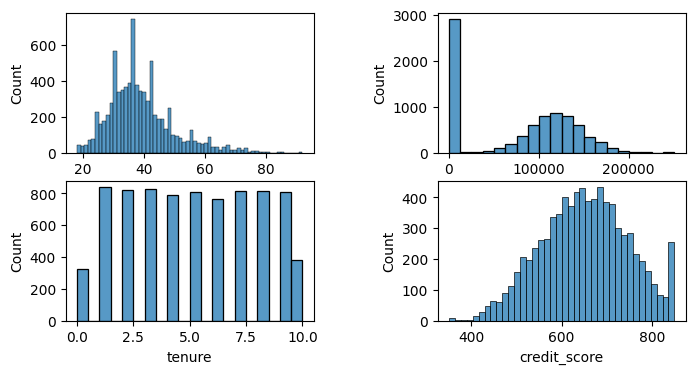

In [46]:
# Create subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=[8, 4])
ax = ax.flatten()

# Plot histograms for numerical features in X_train_num
for idx, col in enumerate(X_train_num):
    sns.histplot(X_train_num[col], ax=ax[idx])

# Adjust the spacing between subplots
fig.subplots_adjust(wspace=0.5)


Saya membuat plot visualisasi kolom X_train_num yang akan di handling skewness nya agar lebih jelas terlihat bagaimana kemiringan/distribusi data nya

#### iii. Count amount of outlier

In [47]:
# Define the threshold for detecting outliers
threshold = 3

# Create a dictionary to store outlier counts for each column
outlier_counts = {}

# Iterate through numeric columns in X_train_num
for col in X_train_num.columns:
    # Get the data in the current column
    data_skew = X_train_num[col]
    
    # Calculate the mean and standard deviation of the data
    mean = np.mean(data_skew)
    std_dev = np.std(data_skew)

    # Calculate upper and lower bounds for outlier detection
    upper_bound = mean + threshold * std_dev
    lower_bound = mean - threshold * std_dev

    # Use NumPy to find the indices of outliers
    outliers = np.where((data_skew > upper_bound) | (data_skew < lower_bound))
    
    # Store the count of outliers in the dictionary
    outlier_counts[col] = len(outliers[0])

# Iterate through the dictionary and print the outlier counts for each column
for col, count in outlier_counts.items():
    print(f"Number of outliers in column {col}: {count} outliers")


Number of outliers in column age: 104 outliers
Number of outliers in column balance: 0 outliers
Number of outliers in column tenure: 0 outliers
Number of outliers in column credit_score: 8 outliers


Saya ingin melihat ada berapa jumlah outlier pada masing-masing kolom dengan threshold 3 karena saya akan menggunakan Z-score/gaussian karena skewness <1. Terlihat ada 104 outlier pada kolom age, 8 outlier pada kolom credit_score dan kolom balance serta tenure bersih dari outlier

#### iv. Count percentage of outlier

In [48]:
# Set the threshold for identifying outliers
threshold = 3

# Initialize a dictionary to store outlier percentages for each numerical column
outlier_percentages = {}

# Iterate through each column in X_train_num
for col in X_train_num.columns:
    data_skew = X_train_num[col]
    mean = np.mean(data_skew)
    std_dev = np.std(data_skew)

    upper_bound = mean + threshold * std_dev
    lower_bound = mean - threshold * std_dev

    # Identify outliers based on the threshold
    outliers = np.where((data_skew > upper_bound) | (data_skew < lower_bound))
    
    # Calculate the percentage of outliers
    total_data_points = len(data_skew)
    percentage = (len(outliers[0]) / total_data_points) * 100
    
    # Store the percentage of outliers in the dictionary
    outlier_percentages[col] = percentage

# Print the percentage of outliers for each column
for col, percentage in outlier_percentages.items():
    print(f"Percentage of outliers in column {col}: {percentage:.2f}%")


Percentage of outliers in column age: 1.30%
Percentage of outliers in column balance: 0.00%
Percentage of outliers in column tenure: 0.00%
Percentage of outliers in column credit_score: 0.10%


Saya ingin melihat berapa persentase outlier dalam setiap kolom untuk menentukan cara handling outlier, apakah di capping atau di trimming. Jika persentase outlier kurang dari 5%, maka saya akan menggunakan metode trimming

Berdasarkan hasil perhitungan, persentase outlier kolom age dan credit_score kurang dari 5%. Karena data latih saya hanya ada 8000 rows dan saya khawatir model saya akan jelek karena kekurangan data, maka saya menggunakan metode capping untuk handling outlier

## H. Preprocessing Using Pipeline

Proses ini dilakukan untuk otomatisasi langkah-langkah pemrosesan data sebelum melatih model. Penggunaan pipeline memudahkan manajemen dan mencegah kebocoran informasi saat evaluasi model.

In [49]:
# Define the numeric features to be processed
numeric_features = ['age', 'balance', 'credit_score', 'tenure']

# Create a numeric transformer pipeline
numeric_transformer = Pipeline(
    steps=[
        ('winsorizer', Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=['age', 'credit_score'])), 
        ('scaler', StandardScaler())
    ]
)
# Fit and transform the numeric features
numeric_pipeline = numeric_transformer.fit_transform(X_train[['age', 'balance', 'credit_score', 'tenure']])

# Define the ordinal features to be processed
ordinal_features = ['products_number', 'country', 'gender']

# Create an ordinal transformer pipeline
ordinal_transformer = Pipeline(
    steps=[
        ('ordinal', OrdinalEncoder(categories=[['1', '2', '3', '4'], ['France', 'Spain', 'Germany'], ['Male', 'Female']]))
    ]
)
# Fit and transform the ordinal features
ordinal_pipeline = ordinal_transformer.fit_transform(X_train[['products_number', 'country', 'gender']])

# Define the categorical features to be processed
binary_features = ['active_member']

# Create a binary transformer pipeline
binary_transformer = Pipeline([
    ('passthrough', None)
])
# Fit and transform the binary features
binary_pipeline = binary_transformer.fit_transform(X_train[['active_member']])


Saya membagi tipe data kategorikal menjadi beberapa jenis, yaitu ordinal_features dan categorical_features. Untuk ordinal_features dikhususkan untuk kolom products_number, country dan gender yang berisi beberapa unique values dan dihandling dengan OrdinalEncoder, sedangkan binary_features untuk kolom yang berisi 2 unique values saja yaitu active_member dan dihandling menggunakan OneHotEncoder. Saya juga membuat numeric_features yang berisi handling skewness dengan winsorizer dan method gaussian, serta scaling menggunakan standardscaler

In [50]:
# Define a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("Numerical", numeric_transformer, numeric_features),
        ("Ordinal", ordinal_transformer, ordinal_features),
        ("Binary", 'passthrough', binary_features),
    ]
)

preprocessor

ColumnTransformer(transformers=[('Numerical',
                                 Pipeline(steps=[('winsorizer',
                                                  Winsorizer(tail='both',
                                                             variables=['age',
                                                                        'credit_score'])),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'balance', 'credit_score', 'tenure']),
                                ('Ordinal',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(categories=[['1',
                                                                              '2',
                                                                              '3',
                                                                              '4'],
                                                                             ['France',
                                                                              'Spain',
                                                                              'Germany'],
                                                                             ['Male',
                                                                              'Female']]))]),
                                 ['products_number', 'country', 'gender']),
                                ('Binary', 'passthrough', ['active_member'])])

Pada langkah ini menggabungkan seluruh transformer dengan column transformer agar menjadi satu pipeline dengan nama variabel preprocessor

In [51]:
# Fit and transform the entire training dataset using the ColumnTransformer
X_train_fix = preprocessor.fit_transform(X_train)
X_train_fix

# Create a DataFrame from the transformed X_train_fix data and specify column names
X_train_fix = pd.DataFrame(X_train_fix, columns=['products_number', 'age', 'active_member', 'balance', 'gender',
       'country', 'credit_score', 'tenure'])

# Show result
X_train_fix

,products_number,age,active_member,balance,gender,country,credit_score,tenure
0,-0.473618,0.712757,1.285890,-0.350525,1.0,2.0,0.0,1.0
1,0.207821,-0.620141,-0.336549,1.032898,0.0,2.0,0.0,1.0
2,-0.668316,0.338378,-1.043766,1.032898,0.0,0.0,0.0,1.0
3,-0.668316,-1.224355,1.285890,-0.350525,1.0,0.0,1.0,0.0
4,0.597215,0.045839,-0.596555,0.341187,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
7995,-0.570967,0.514074,-0.960564,-1.733948,0.0,0.0,0.0,1.0
7996,-1.057710,1.338163,0.516272,1.032898,0.0,1.0,0.0,0.0
7997,0.013124,-1.224355,-1.906987,-0.004669,1.0,1.0,0.0,1.0
7998,-0.278921,0.477449,-0.887762,0.341187,0.0,0.0,0.0,0.0


Pada langkah ini dilakukan pengaplikasian pipeline preprocessor pada data X_train

In [52]:
# Apply the preprocessor to transform X_test
X_test_fix = preprocessor.transform(X_test)

# Show result
X_test_fix

array([[ 0.30516983,  0.22194632,  0.13146246, ...,  2.        ,
         0.        ,  1.        ],
       [ 1.08395816,  0.90062863,  0.29786646, ...,  2.        ,
         1.        ,  1.        ],
       [-0.08422433,  0.56789576, -0.50295279, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.86301266,  0.57650188, -0.24294654, ...,  2.        ,
         0.        ,  1.        ],
       [ 0.88926108, -1.22435473, -1.84458503, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.1813067 ,  0.22394136, -1.13736804, ...,  2.        ,
         0.        ,  0.        ]])

Pada langkah ini dilakukan pengaplikasian pipeline preprocessor pada data X_test

## I. Imbalance Handling

Imbalance Handling adalah proses mengatasi ketidakseimbangan dalam distribusi kelas dalam dataset. Ketidakseimbangan terjadi ketika satu kelas dalam dataset memiliki jumlah sampel yang jauh lebih banyak atau lebih sedikit daripada kelas lainnya.

Saya memisahkan proses imbalance handling dengan pipeline preprocessor karena imbalance handling diaplikasikan hanya pada data latih, sedangkan pipeline preprocessor diaplikasikan pada data latih dan data uji. Jika imbalance handling dimasukkan kedalam pipeline preprocessor, maka akan terjadi error pada data uji nya.

In [53]:
# Displaying values before imbalance handling
print("Jumlah kelas sebelum imbalance handling:")
print(y_train.value_counts())

Jumlah kelas sebelum imbalance handling:
churn
0        6370
1        1630
dtype: int64


Terlihat bahwa data sangat tidak balance, yaitu 6:1

In [54]:
# Define the undersampler with a sampling strategy of 1.0 (100% undersampling)
undersampler = RandomUnderSampler(sampling_strategy=1.0, random_state=0)

# Apply undersampling to the training dataset
X_train_balance, y_train_balance = undersampler.fit_resample(X_train_fix, y_train)


Saya menggunakan undersampling karena tidak mau memakai data dummy untuk proses oversampling. Saya menjaga keaslian data untuk proses pemodelan

In [55]:
# Create dataframe
X_train_balance = pd.DataFrame(X_train_balance)
y_train_balance = pd.DataFrame(y_train_balance)

Membuat dataframe untuk variabel X_train_balance dan y_train_balance agar lebih mudah dalam proses pemodelan

In [56]:
# Displaying values after imbalance handling
print("Jumlah kelas sesudah imbalance handling:")
print(y_train_balance.value_counts())

Jumlah kelas sesudah imbalance handling:
churn
0        1630
1        1630
dtype: int64


Jumlah data antar value sudah sama yaitu 1630 data

# **vi. Model Definition**

Bagian ini berisi cell untuk mendefinisikan model.

## 1. Initialization Default Model

### A. K-Nearest Neighbours

In [57]:
# Creating a KNN default model
knn_model = KNeighborsClassifier(n_neighbors=7)

# Fitting the model to the training data
knn_model.fit(X_train_balance, y_train_balance)

KNeighborsClassifier(n_neighbors=7)

Saya mendefinisikan model KNN dan fit pada X_train dan y_train

### B. SVM

In [58]:
# Creating a SVM default model
svm_model = SVC()

# Fitting the model to the training data
svm_model.fit(X_train_balance, y_train_balance)

SVC()

Saya mendefinisikan model SVM dan fit pada X_train dan y_train

### C. Random Forest Classifier

In [59]:
# Creating a Random Forest Classifier default model
rf_model = RandomForestClassifier()

# Fitting the model to the training data
rf_model.fit(X_train_balance, y_train_balance)

RandomForestClassifier()

Saya mendefinisikan model Random Forest dan fit pada X_train dan y_train

### D. Decision Tree

In [60]:
# Creating a Decision Tree Classifier default model
dt_model = DecisionTreeClassifier()

# Fitting the model to the training data
dt_model.fit(X_train_balance, y_train_balance)

DecisionTreeClassifier()

Saya mendefinisikan model Decision Tree Classifier dan fit pada X_train dan y_train

### E. ADABoosting

In [61]:
# Creating a ADABoost Classifier default model
adaboost_model = AdaBoostClassifier()

# Fitting the model to the training data
adaboost_model.fit(X_train_balance, y_train_balance)

AdaBoostClassifier()

Saya mendefinisikan model ADABoost Classifier dan fit pada X_train dan y_train

## 2. Classification Report

##### **Saya memakai kelas positif(1) sebagai kelas churn dan kelas negatif(0) adalah kelas loyal. Dan saya memilih Recall untuk nilai evaluasi karena ingin mengurangi False Negative(FN). Pada kasus ini, False Negative berarti diprediksi loyal, aktual churn**

### A. K-Nearest Neighbours

In [62]:
# Predicting the target labels for the train data using the KNN default model
y_train_knn_predict = knn_model.predict(X_train_balance)

# Predicting the target labels for the test data using the KNN default model
y_test_knn_predict = knn_model.predict(X_test_fix)

# Displaying the classification report for KNN default model on the train data
print('----------Classification Report for KNN X train-------------')
print(classification_report(y_train_balance,y_train_knn_predict))

# Displaying the classification report for KNN default model on the test data
print('----------Classification Report for KNN X test-------------')
print(classification_report(y_test,y_test_knn_predict))

----------Classification Report for KNN X train-------------
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1630
           1       0.83      0.79      0.81      1630

    accuracy                           0.81      3260
   macro avg       0.81      0.81      0.81      3260
weighted avg       0.81      0.81      0.81      3260

----------Classification Report for KNN X test-------------
              precision    recall  f1-score   support

           0       0.91      0.77      0.84      1593
           1       0.44      0.69      0.54       407

    accuracy                           0.76      2000
   macro avg       0.67      0.73      0.69      2000
weighted avg       0.81      0.76      0.78      2000



- Skor KNN X_train adalah : 81% untuk f1-score, 79% untuk recall, 83% untuk precision dan 81% untuk accuracy
- Skor KNN X_test adalah : 54% untuk f1-score, 69% untuk recall, 44% untuk precision dan 76% untuk accuracy
- Model ini overfitting karena nilai X_train lebih besar daripada X_test

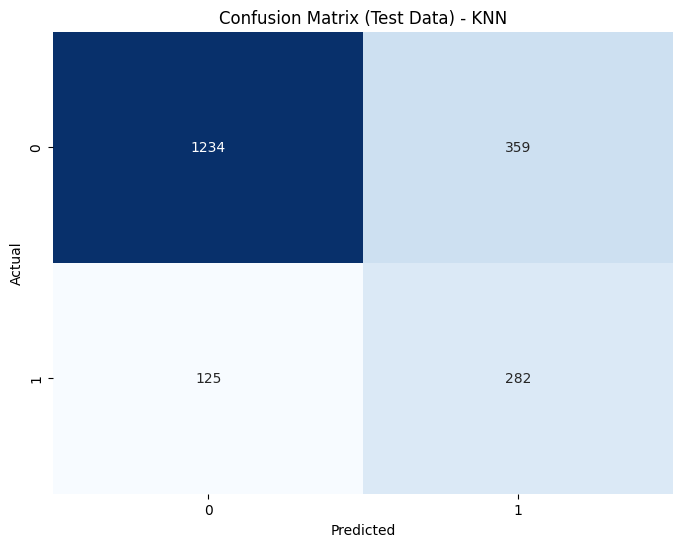

In [63]:
# Confusion matrix for the test data
confusion_matrix_test_knn = confusion_matrix(y_test, y_test_knn_predict)

# Create a heatmap of the confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Data) - KNN')
plt.show()

Model ini memprediksi 282 data sebagai True Positive (TP), 125 data sebagai False Negative (FN), 359 data sebagai False Positive (FP) dan 1234 data sebagai True Negative (TN)

### B. SVM

In [64]:
# Predicting the target labels for the train data using the SVM default model
y_train_svm_predict = svm_model.predict(X_train_balance)

# Predicting the target labels for the test data using the SVM default model
y_test_svm_predict = svm_model.predict(X_test_fix)

# Displaying the classification report for SVM default model on the train data
print('----------Classification Report for SVM X train-------------')
print(classification_report(y_train_balance,y_train_svm_predict))

# Displaying the classification report for SVM default model on the test data
print('----------Classification Report for SVM X test-------------')
print(classification_report(y_test,y_test_svm_predict))

----------Classification Report for SVM X train-------------
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1630
           1       0.82      0.78      0.80      1630

    accuracy                           0.81      3260
   macro avg       0.81      0.81      0.81      3260
weighted avg       0.81      0.81      0.81      3260

----------Classification Report for SVM X test-------------
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1593
           1       0.49      0.72      0.58       407

    accuracy                           0.79      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.83      0.79      0.80      2000



- Skor SVM X_train adalah : 80% untuk f1-score, 78% untuk recall, 82% untuk precision dan 81% untuk accuracy
- Skor SVM X_test adalah : 58% untuk f1-score, 72% untuk recall, 49% untuk precision dan 79% untuk accuracy
- Model ini juga overfitting karena nilai X_train lebih besar daripada X_test

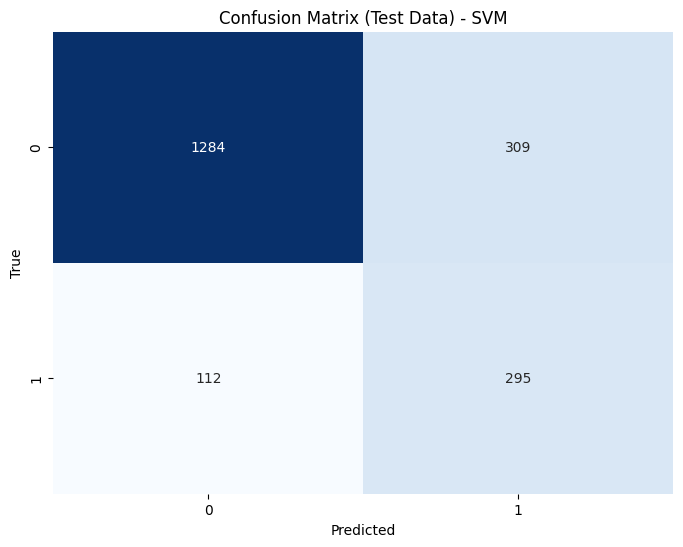

In [65]:
# Confusion matrix for the test data
confusion_matrix_test_svm = confusion_matrix(y_test, y_test_svm_predict)

# Create a heatmap of the confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Data) - SVM')
plt.show()

Model ini memprediksi 295 data sebagai True Positive (TP), 112 data sebagai False Negative (FN), 309 data sebagai False Positive (FP) dan 1284 data sebagai True Negative (TN)

### C. Random Forest Classifier

In [66]:
# Predicting the target labels for the train data using the Random Forest Classifier
y_train_rf_predict = rf_model.predict(X_train_balance)

# Predicting the target labels for the test data using the Random Forest Classifier
y_test_rf_predict = rf_model.predict(X_test_fix)

# Displaying the classification report for Random Forest Classifier on the train data
print('----------Classification Report for Random Forest Classifier X train-------------')
print(classification_report(y_train_balance,y_train_rf_predict))

# Displaying the classification report for Random Forest Classifier on the test data
print('----------Classification Report for Random Forest Classifier X test-------------')
print(classification_report(y_test,y_test_rf_predict))

----------Classification Report for Random Forest Classifier X train-------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1630
           1       1.00      1.00      1.00      1630

    accuracy                           1.00      3260
   macro avg       1.00      1.00      1.00      3260
weighted avg       1.00      1.00      1.00      3260

----------Classification Report for Random Forest Classifier X test-------------
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1593
           1       0.48      0.73      0.58       407

    accuracy                           0.79      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.79      0.80      2000



- Skor Random Forest X_train adalah : 100% untuk f1-score, 100% untuk recall, 100% untuk precision dan 100% untuk accuracy
- Skor Random Forest X_test adalah : 58% untuk f1-score, 72% untuk recall, 49% untuk precision dan 79% untuk accuracy
- Model ini juga overfitting karena nilai X_train lebih besar daripada X_test

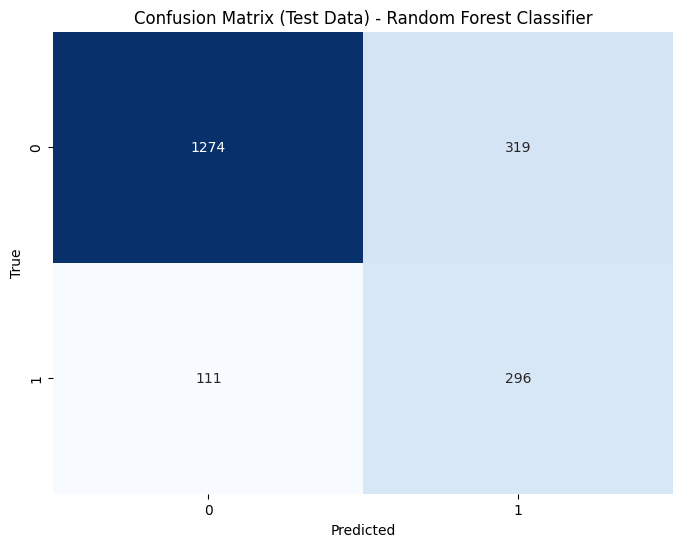

In [67]:
# Confusion matrix for the test data
confusion_matrix_test_rf = confusion_matrix(y_test, y_test_rf_predict)

# Create a heatmap of the confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Data) - Random Forest Classifier')
plt.show()

Model ini memprediksi 295 data sebagai True Positive (TP), 112 data sebagai False Negative (FN), 308 data sebagai False Positive (FP) dan 1285 data sebagai True Negative (TN)

### D. Decision Tree Classifier

In [68]:
# Predicting the target labels for the train data using the Decision Tree Classifier
y_train_dt_predict = dt_model.predict(X_train_balance)

# Predicting the target labels for the test data using the Decision Tree Classifier
y_test_dt_predict = dt_model.predict(X_test_fix)

# Displaying the classification report for Decision Tree Classifier on the train data
print('----------Classification Report for Decision Tree Classifier X train-------------')
print(classification_report(y_train_balance,y_train_dt_predict))

# Displaying the classification report for Decision Tree Classifier on the test data
print('----------Classification Report for Decision Tree Classifier X test-------------')
print(classification_report(y_test,y_test_dt_predict))

----------Classification Report for Decision Tree Classifier X train-------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1630
           1       1.00      1.00      1.00      1630

    accuracy                           1.00      3260
   macro avg       1.00      1.00      1.00      3260
weighted avg       1.00      1.00      1.00      3260

----------Classification Report for Decision Tree Classifier X test-------------
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1593
           1       0.39      0.71      0.50       407

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000



- Skor Decision Tree X_train adalah : 100% untuk f1-score, 100% untuk recall, 100% untuk precision dan 100% untuk accuracy
- Skor Decision Tree X_test adalah : 50% untuk f1-score, 71% untuk recall, 39% untuk precision dan 71% untuk accuracy
- Model ini juga overfitting karena nilai X_train lebih besar daripada X_test

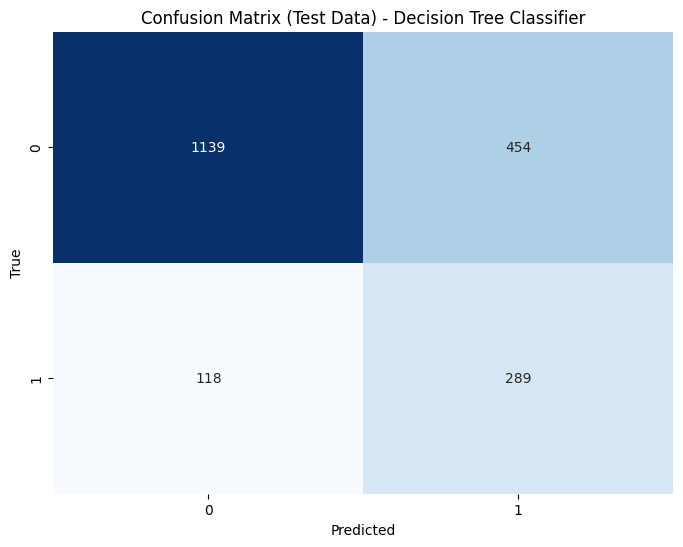

In [69]:
# Confusion matrix for the test data
confusion_matrix_test_dt = confusion_matrix(y_test, y_test_dt_predict)

# Create a heatmap of the confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Data) - Decision Tree Classifier')
plt.show()

Model ini memprediksi 290 data sebagai True Positive (TP), 117 data sebagai False Negative (FN), 463 data sebagai False Positive (FP) dan 1130 data sebagai True Negative (TN)

### E. ADABoost Classifier

In [70]:
# Predicting the target labels for the train data using the ADABoost Classifier
y_train_adaboost_predict = adaboost_model.predict(X_train_balance)

# Predicting the target labels for the test data using the ADABoost Classifier
y_test_adaboost_predict = adaboost_model.predict(X_test_fix)

# Displaying the classification report for ADABoost Classifier on the train data
print('----------Classification Report for ADABoost Classifier X train-------------')
print(classification_report(y_train_balance,y_train_adaboost_predict))

# Displaying the classification report for ADABoost Classifier on the test data
print('----------Classification Report for ADABoost Classifier X test-------------')
print(classification_report(y_test,y_test_adaboost_predict))

----------Classification Report for ADABoost Classifier X train-------------
              precision    recall  f1-score   support

           0       0.77      0.80      0.78      1630
           1       0.79      0.76      0.77      1630

    accuracy                           0.78      3260
   macro avg       0.78      0.78      0.78      3260
weighted avg       0.78      0.78      0.78      3260

----------Classification Report for ADABoost Classifier X test-------------
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1593
           1       0.48      0.74      0.58       407

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.83      0.78      0.80      2000



- Skor ADABoost X_train adalah : 77% untuk f1-score, 76% untuk recall, 79% untuk precision dan 78% untuk accuracy
- Skor ADABoost X_test adalah : 58% untuk f1-score, 74% untuk recall, 48% untuk precision dan 78% untuk accuracy
- Model ini juga overfitting karena nilai X_train lebih besar daripada X_test

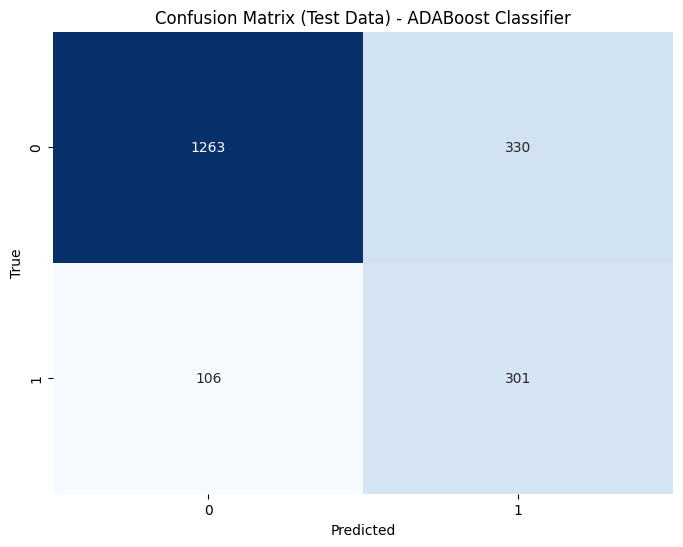

In [71]:
# Confusion matrix for the test data
confusion_matrix_test_adaboost = confusion_matrix(y_test, y_test_adaboost_predict)

# Create a heatmap of the confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test_adaboost, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Data) - ADABoost Classifier')
plt.show()

Model ini memprediksi 301 data sebagai True Positive (TP), 106 data sebagai False Negative (FN), 330 data sebagai False Positive (FP) dan 1263 data sebagai True Negative (TN)

## 3. Cross Validation

### A. K-Nearest Neighbours

In [72]:
# Define a pipeline for K-Nearest Neighbors (KNN) classification
pipe_knn = [('model', KNeighborsClassifier())]
pipeline_knn = Pipeline(pipe_knn)

# Calculate recall scores during cross-validation
recall_train_cross_val_knn = cross_val_score(
    pipeline_knn, X_train_balance, y_train_balance, cv=5, scoring="recall")

# Print recall score information
print('Recall Score - All - Cross Validation  : ', recall_train_cross_val_knn)
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val_knn.mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val_knn.std())
print('Recall Score - Range of Test-Set       : ',
      (recall_train_cross_val_knn.mean() - recall_train_cross_val_knn.std()), '-',
      (recall_train_cross_val_knn.mean() + recall_train_cross_val_knn.std()))


Recall Score - All - Cross Validation  :  [0.75460123 0.71472393 0.70552147 0.69325153 0.73619632]
Recall Score - Mean - Cross Validation :  0.7208588957055214
Recall Score - Std - Cross Validation  :  0.02194913352147031
Recall Score - Range of Test-Set       :  0.6989097621840511 - 0.7428080292269917


Rata-rata nilai Cross Validation dari model KNN adalah 0.72 artinya model ini cukup konsisten jika digunakan karena mendekati angka 1. Dan Standar Deviasi nya adalah 0.02 yang mendekati angka 0 artinya bestfit. Range test nya berkisar antara antara 69-74%

### B. SVM

In [73]:
# Define a pipeline for Support Vector Machine (SVM) classification
pipe_svm = [('model', SVC())]
pipeline_svm = Pipeline(pipe_svm)

# Calculate recall scores during cross-validation
recall_train_cross_val_svm = cross_val_score(
    pipeline_svm, X_train_balance, y_train_balance, cv=5, scoring="recall")

# Print recall score information
print('Recall Score - All - Cross Validation  : ', recall_train_cross_val_svm)
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val_svm.mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val_svm.std())
print('Recall Score - Range of Test-Set       : ',
      (recall_train_cross_val_svm.mean() - recall_train_cross_val_svm.std()), '-',
      (recall_train_cross_val_svm.mean() + recall_train_cross_val_svm.std()))


Recall Score - All - Cross Validation  :  [0.76993865 0.7607362  0.7607362  0.71779141 0.74539877]
Recall Score - Mean - Cross Validation :  0.750920245398773
Recall Score - Std - Cross Validation  :  0.018343455690461436
Recall Score - Range of Test-Set       :  0.7325767897083115 - 0.7692637010892345


Rata-rata nilai Cross Validation dari model SVM adalah 0.75 artinya model ini cukup konsisten jika digunakan karena mendekati angka 1. Dan Standar Deviasi nya adalah 0.01 yang mendekati angka 0 artinya bestfit. Range test nya berkisar antara 73-76%

### C. Random Forest Classifier

In [74]:
# Define a pipeline for Random Forest Classifier
pipe_rf = [('model', RandomForestClassifier())]
pipeline_rf = Pipeline(pipe_rf)

# Calculate recall scores during cross-validation
recall_train_cross_val_rf = cross_val_score(
    pipeline_rf, X_train_balance, y_train_balance, cv=5, scoring="recall")

# Print recall score information
print('Recall Score - All - Cross Validation  : ', recall_train_cross_val_rf)
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val_rf.mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val_rf.std())
print('Recall Score - Range of Test-Set       : ',
      (recall_train_cross_val_rf.mean() - recall_train_cross_val_rf.std()), '-',
      (recall_train_cross_val_rf.mean() + recall_train_cross_val_rf.std()))


Recall Score - All - Cross Validation  :  [0.75766871 0.76687117 0.75460123 0.73006135 0.74846626]
Recall Score - Mean - Cross Validation :  0.7515337423312884
Recall Score - Std - Cross Validation  :  0.012269938650306744
Recall Score - Range of Test-Set       :  0.7392638036809817 - 0.7638036809815952


Rata-rata nilai Cross Validation dari model Random Forest adalah 0.74 artinya model ini cukup konsisten jika digunakan karena mendekati angka 1. Dan Standar Deviasi nya adalah 0.01 yang mendekati angka 0 artinya bestfit. Range test nya berkisar antara 73-75%

### D. Decision Tree Classifier

In [75]:
# Define a pipeline for Decision Tree Classifier
pipe_dt = [('model', DecisionTreeClassifier())]
pipeline_dt = Pipeline(pipe_dt)

# Calculate recall scores during cross-validation
recall_train_cross_val_dt = cross_val_score(
    pipeline_dt, X_train_balance, y_train_balance, cv=5, scoring="recall")

# Print recall score information
print('Recall Score - All - Cross Validation  : ', recall_train_cross_val_dt)
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val_dt.mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val_dt.std())
print('Recall Score - Range of Test-Set       : ',
      (recall_train_cross_val_dt.mean() - recall_train_cross_val_dt.std()), '-',
      (recall_train_cross_val_dt.mean() + recall_train_cross_val_dt.std()))


Recall Score - All - Cross Validation  :  [0.6993865  0.68404908 0.7208589  0.68404908 0.69631902]
Recall Score - Mean - Cross Validation :  0.6969325153374232
Recall Score - Std - Cross Validation  :  0.013496932515337385
Recall Score - Range of Test-Set       :  0.6834355828220858 - 0.7104294478527605


Rata-rata nilai Cross Validation dari model Decision Tree adalah 0.69 artinya model ini kurang konsisten jika digunakan karena jauh dari angka 1. Dan Standar Deviasi nya adalah 0.02 yang mendekati angka 0 artinya bestfit. Range test nya berkisar antara 68-71%

### E. ADABoost Classifier

In [76]:
# Define a pipeline for ADABoost Classifier
pipe_adaboost = [('Classifier', AdaBoostClassifier())]
pipeline_adaboost = Pipeline(pipe_adaboost)

# Calculate recall scores during cross-validation
recall_train_cross_val_adaboost = cross_val_score(
    pipeline_adaboost, X_train_balance, y_train_balance, cv=5, scoring="recall")

# Print recall score information
print('Recall Score - All - Cross Validation  : ', recall_train_cross_val_adaboost)
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val_adaboost.mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val_adaboost.std())
print('Recall Score - Range of Test-Set       : ',
      (recall_train_cross_val_adaboost.mean() - recall_train_cross_val_adaboost.std()), '-',
      (recall_train_cross_val_adaboost.mean() + recall_train_cross_val_adaboost.std()))


Recall Score - All - Cross Validation  :  [0.74233129 0.75766871 0.75766871 0.73619632 0.77607362]
Recall Score - Mean - Cross Validation :  0.7539877300613496
Recall Score - Std - Cross Validation  :  0.013908937483134504
Recall Score - Range of Test-Set       :  0.7400787925782151 - 0.767896667544484


Rata-rata nilai Cross Validation dari model ADABoost adalah 0.75 artinya model ini cukup konsisten jika digunakan karena mendekati angka 1. Dan Standar Deviasi nya adalah 0.01 yang mendekati angka 0 artinya bestfit. Range test nya berkisar antara 74-76%

In [77]:
# Define a dictionary to store mean and standard deviation for each model
model_scores = {
    'KNN': (recall_train_cross_val_knn.mean(), recall_train_cross_val_knn.std()),
    'SVM': (recall_train_cross_val_svm.mean(), recall_train_cross_val_svm.std()),
    'Random Forest': (recall_train_cross_val_rf.mean(), recall_train_cross_val_rf.std()),
    'Decision Tree': (recall_train_cross_val_dt.mean(), recall_train_cross_val_dt.std()),
    'AdaBoost': (recall_train_cross_val_adaboost.mean(), recall_train_cross_val_adaboost.std())
}

# Find the model with the highest mean recall score
best_model = max(model_scores, key=lambda k: model_scores[k][0])
best_mean_score, best_std_dev = model_scores[best_model]

# Print the best model and its mean and standard deviation
print(f"Model dengan nilai mean tertinggi adalah {best_model} dengan nilai mean {best_mean_score:.4f} dan standar deviasi {best_std_dev:.4f}")


Model dengan nilai mean tertinggi adalah AdaBoost dengan nilai mean 0.7540 dan standar deviasi 0.0139


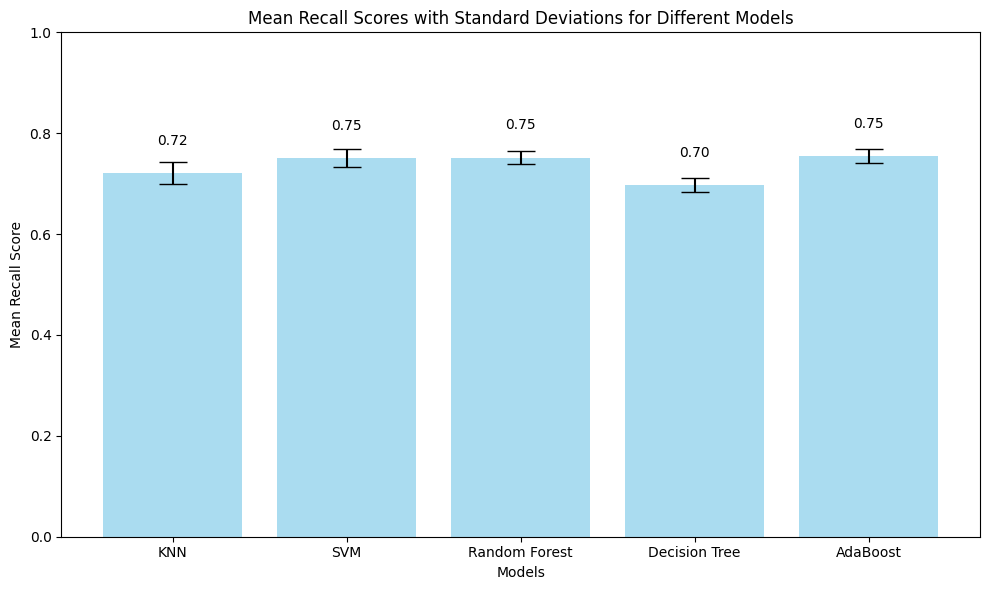

In [78]:
# Define the models and their corresponding mean recall scores and standard deviations
models = ['KNN', 'SVM', 'Random Forest', 'Decision Tree', 'AdaBoost']
mean_scores = [model_scores[model][0] for model in models]
std_devs = [model_scores[model][1] for model in models]

# Create a bar plot with error bars for standard deviation
plt.figure(figsize=(10, 6))
plt.bar(models, mean_scores, yerr=std_devs, capsize=10, color='skyblue', alpha=0.7)
plt.xlabel('Models')
plt.ylabel('Mean Recall Score')
plt.title('Mean Recall Scores with Standard Deviations for Different Models')
plt.ylim([0, 1]) 

# Display the values on top of each bar
for i, v in enumerate(mean_scores):
    plt.text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom')

# Show result
plt.tight_layout()
plt.show()

Dapat dilihat bahwa model SVM, random forest dan adaboost memiliki nilai rata-rata yang sama. Maka dari itu, kita melihat nilai standar deviasi yang mendekati 0, dan didapatkan kalau model ADABoost memiliki nilai standar deviasi terkecil dibandingkan kedua model lainnya.

# **vii. Model Training**

Pada bagian ini berisi code untuk melatih model melalui beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan.

### Hyperparameter Tuning

Hyperparameter tuning adalah proses mencari dan memilih kombinasi terbaik dari hyperparameter untuk model machine learning guna meningkatkan kinerja model pada data uji.

Hyperparameter tuning adalah proses mencari dan memilih kombinasi terbaik dari hyperparameter untuk model machine learning guna meningkatkan kinerja model pada data uji.

In [79]:
# Define the pipeline with the AdaBoost model
pipeline_adaboost = Pipeline([
    ('model', AdaBoostClassifier())  # 'model' is the step name for the AdaBoost model
])

# Define a dictionary of hyperparameters for RandomizedSearchCV
adaboost_randomcv_params = {
    'model__n_estimators': [100, 150, 200],
    'model__learning_rate': [0.01, 0.1, 0.5, 1.0],
    'model__random_state': [42]
}

Saya mencoba beberapa parameter yaitu:
1. n_estimators : Parameter ini mengatur jumlah estimator base yang akan digunakan dalam ensemble. Ini mengontrol seberapa banyak "weak learners" yang akan berkontribusi pada model.
2. learning_rate : Parameter ini mengatur tingkat pembelajaran (learning rate) untuk mengontrol seberapa besar bobot yang diberikan kepada estimator pada setiap iterasi.
3. random_state: Parameter ini mengatur nilai seed untuk generator nomor acak yang digunakan dalam inisialisasi estimator base. Ini memungkinkan untuk membuat hasil yang dapat direproduksi.

In [80]:
# Create a RandomizedSearchCV object for AdaBoost within the pipeline
adaboost_randomcv = RandomizedSearchCV(
    pipeline_adaboost,
    param_distributions=adaboost_randomcv_params,
    n_iter=30,
    cv=5,
    random_state=25,
    n_jobs=-1,
    scoring='recall'
)

# Train the AdaBoost model with parameter search
adaboost_randomcv.fit(X_train_balance, y_train_balance)

/Users/valdi/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/valdi/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/valdi/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/valdi/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('model', AdaBoostClassifier())]),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'model__learning_rate': [0.01, 0.1, 0.5,
                                                                 1.0],
                                        'model__n_estimators': [100, 150, 200],
                                        'model__random_state': [42]},
                   random_state=25, scoring='recall')

In [81]:
# Get the mean recall score from the hyperparameter search results
mean_recall_score = adaboost_randomcv.best_score_

print(f"Nilai mean dari hasil pencarian hyperparameter adalah: {mean_recall_score:.4f}")

# Get the standard deviation of the recall scores from the hyperparameter search results
std_recall_score = adaboost_randomcv.cv_results_['std_test_score'][adaboost_randomcv.best_index_]

print(f"Nilai standar deviasi dari hasil pencarian hyperparameter adalah: {std_recall_score:.4f}")


Nilai mean dari hasil pencarian hyperparameter adalah: 0.7491
Nilai standar deviasi dari hasil pencarian hyperparameter adalah: 0.0181


Nilai mean adalah 0.74 dan nilai standar deviasi adalah 0.01. Berarti model ini bestfit karena mendekati 0

In [82]:
# Print the best parameters found for the AdaBoost Classifier
print("Best Parameters (ADABOOST Classifier): ", adaboost_randomcv.best_params_)

# Print the best accuracy obtained for the AdaBoost Classifier
print("Best Accuracy (ADABOOST Classifier): ", adaboost_randomcv.best_score_)



Best Parameters (ADABOOST Classifier):  {'model__random_state': 42, 'model__n_estimators': 200, 'model__learning_rate': 0.1}
Best Accuracy (ADABOOST Classifier):  0.749079754601227


Best parameter untuk ADABoost Classifier adalah model__random_state': 42, 'model__n_estimators': 200 dan 'model__learning_rate': 0.1. Serta akurasi terbaik untuk ADABoost Classifier adalah 0.74 atau 74%

In [83]:
# Use the best AdaBoost Classifier model to make predictions
best_adaboost_estimator = adaboost_randomcv.best_estimator_

Membuat variabel baru untuk menyimpan estimator terbaik untuk model ADABoost

In [84]:
# Use the best AdaBoost Classifier model to make predictions on the test data
y_pred_adaboost = best_adaboost_estimator.predict(X_test_fix)

# Evaluate the performance of the best AdaBoost model
adaboost_score = recall_score(y_test, y_pred_adaboost)  # Calculate recall score
adaboost_accuracy = accuracy_score(y_test, y_pred_adaboost)  # Calculate accuracy

# Print the evaluation results
print("Recall Score (ADABoost Hyperparameter Tuning):", adaboost_score)
print("Accuracy (ADA Boost Hyperparameter Tuning):", adaboost_accuracy)

Recall Score (ADABoost Hyperparameter Tuning): 0.7321867321867321
Accuracy (ADA Boost Hyperparameter Tuning): 0.782


Recall score nya adalah 73,2% dan akurasi 78,2%

In [85]:
# Use the best AdaBoost Classifier model to make predictions on the balanced training data
y_pred_train_finals = best_adaboost_estimator.predict(X_train_balance)

# Calculate and print the recall score on the training set
print('Recall Score - Train Set:', recall_score(y_train_balance, y_pred_train_finals), '\n')

# Generate and print the classification report on the training set
print('Classification Report:\n', classification_report(y_train_balance, y_pred_train_finals), '\n')


Recall Score - Train Set: 0.752760736196319 

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78      1630
           1       0.79      0.75      0.77      1630

    accuracy                           0.78      3260
   macro avg       0.78      0.78      0.78      3260
weighted avg       0.78      0.78      0.78      3260
 



Classification report untuk y_predict_train di hyperparameter tuning model ADA Boost adalah F1 score 77%, recall 75%, precision 79% dan akurasi 78%

In [86]:
# Use the best AdaBoost Classifier model to make predictions on the test data
y_pred_test_finals = best_adaboost_estimator.predict(X_test_fix)

# Calculate and print the recall score on the test set
print('Recall Score - Test Set  : ', recall_score(y_test, y_pred_test_finals), '\n')

# Generate and print the classification report on the test set
print('Classification Report : \n', classification_report(y_test, y_pred_test_finals), '\n')


Recall Score - Test Set  :  0.7321867321867321 

Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.79      0.85      1593
           1       0.48      0.73      0.58       407

    accuracy                           0.78      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.78      0.80      2000
 



Classification report untuk y_predict_test di hyperparameter tuning model ADA Boost adalah F1 score 58%, recall 73%, precision 48% dan akurasi 78%

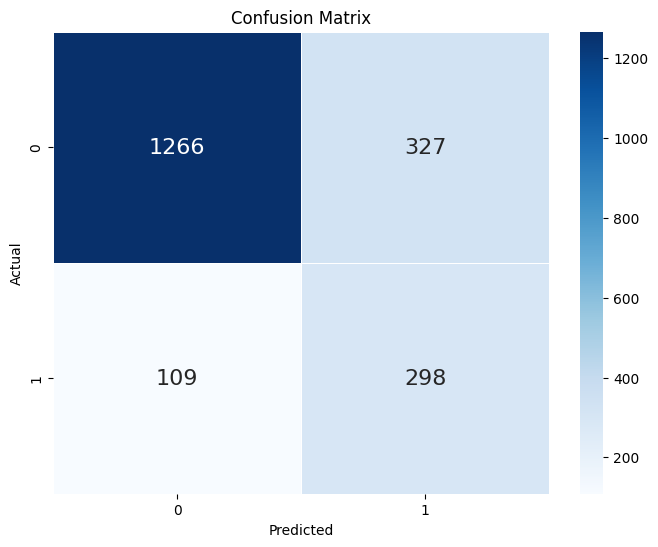

In [87]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_test_finals)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Model ini memprediksi 298 data sebagai True Positive (TP), 109 data sebagai False Negative (FN), 327 data sebagai False Positive (FP) dan 1266 data sebagai True Negative (TN)

# **viii. Model Evaluation**

Pada bagian ini, dilakukan evaluasi model untuk menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. 

In [88]:
# Dictionary to store performance reports
all_reports = {}

# Function to create a performance report
def performance_report(all_reports, y_test, y_test_adaboost_predict, name):
    # Calculate various classification metrics and store them in a dictionary
    score_reports = {
        'test - precision': precision_score(y_test, y_test_adaboost_predict),
        'test - recall': recall_score(y_test, y_test_adaboost_predict),
        'test - accuracy': accuracy_score(y_test, y_test_adaboost_predict),
        'test - f1_score': f1_score(y_test, y_test_adaboost_predict),
    }
    # Store the performance report in the dictionary with a specified name
    all_reports[name] = score_reports
    return all_reports

# Call the performance_report function to create a report with the name 'Model Default ADA Boost'
reports_default = performance_report(all_reports, y_test, y_test_adaboost_predict, 'Model Default ADA Boost')

# Display the performance report as a DataFrame
pd.DataFrame(reports_default)


,Model Default ADA Boost
test - accuracy,0.782000
test - f1_score,0.579961
test - precision,0.477021
test - recall,0.739558


Pada tabel diatas menunjukkan performa ADABoost default model atau sebelum dilakukan hyperparameter tuning. Terlihat bahwa accuracy score 78%, F1-score 57%, precision 47% dan recall 73%. Untuk selanjutnya, saya akan melakukan perbandingan dengan model ADABoost setelah dilakukan hyperparameter tuning.

In [89]:
# Call the performance_report function to create a report for the tuned AdaBoost model
all_reports = performance_report(all_reports, y_test, y_pred_test_finals, 'Model Tuning ADA Boost')

# Display all performance reports in a DataFrame
pd.DataFrame(all_reports)

,Model Default ADA Boost,Model Tuning ADA Boost
test - precision,0.477021,0.476800
test - recall,0.739558,0.732187
test - accuracy,0.782000,0.782000
test - f1_score,0.579961,0.577519


Nilai recall untuk test pada model tuning adalah 73,2% dan pada model default adalah 73,9%. Maka dari itu saya memilih model default baseline model ADABoost sebagai model yang akan memprediksi data baru nantinya.

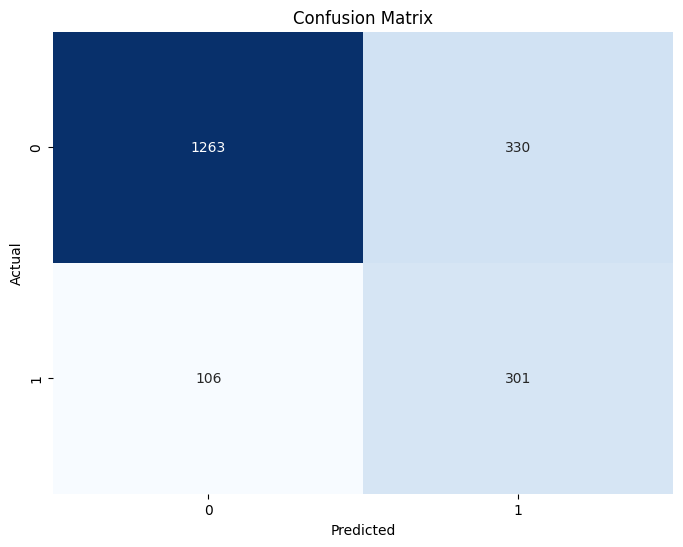

In [90]:
# Calculate predictions on the test data using the AdaBoost model
y_pred_test_finals = adaboost_model.predict(X_test_fix)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred_test_finals)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Pada confusion matrix terlihat bahwa 301 data diprediksi sebagai True Positive(TP), 106 data diprediksi sebagai False Negative (FN), 330 data diprediksi sebagai False Positive(FP), dan 1263 data diprediksi sebagai True Negative(TN). Berdasarkan confusion matrix ini, data False Negative(FN) dapat diminimalisir sehingga tujuan awal kita tercapai.

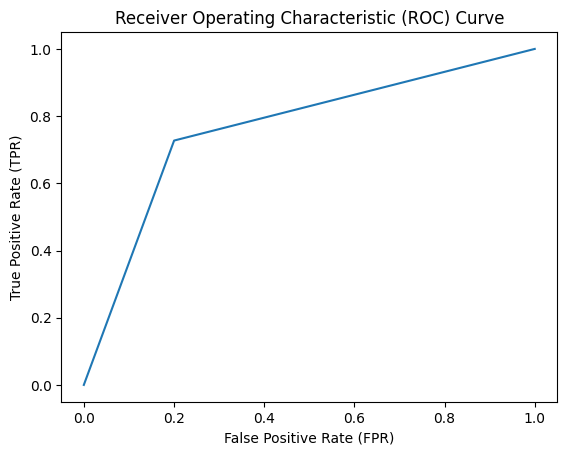

Skor AUC untuk model adalah: 0.763510814358272


In [91]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_rf_predict)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.show()

# Calculate the Area Under the ROC Curve (AUC)
auc = roc_auc_score(y_test, y_test_rf_predict)

# Print the AUC score
print(f"Skor AUC untuk model adalah: {auc}")


Pada skor AUC adalah 0.76 menandakan model ini cukup baik dalam membedakan kelas negatif dan positif. Jika AUC <1, maka model sempurna dalam membedakan antara kelas positif dan negatif.

# **ix. Final Pipeline**

Langkah ini dilakukan untuk menggabungkan beberapa pipeline yang sudah dibuat sebelumnya

In [92]:
# Create an instance of Preprocessor pipeline
preprocessor

ColumnTransformer(transformers=[('Numerical',
                                 Pipeline(steps=[('winsorizer',
                                                  Winsorizer(tail='both',
                                                             variables=['age',
                                                                        'credit_score'])),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'balance', 'credit_score', 'tenure']),
                                ('Ordinal',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(categories=[['1',
                                                                              '2',
                                                                              '3',
                                                                              '4'],
                                                                             ['France',
                                                                              'Spain',
                                                                              'Germany'],
                                                                             ['Male',
                                                                              'Female']]))]),
                                 ['products_number', 'country', 'gender']),
                                ('Binary', 'passthrough', ['active_member'])])

Saya memanggil variabel preprocessor sebagai pipeline awal untuk preprocessing agar bisa digabung dengan pipeline model dan jadi pipeline final


In [93]:
# Create an instance of AdaBoostClassifier
adaboost_model = AdaBoostClassifier()

# Fit the AdaBoost model to the balanced training data
adaboost_model.fit(X_train_balance, y_train_balance)

AdaBoostClassifier()

Saya juga memanggil model ADABoost sebagai model yang terpilih setelah melalui proses evaluasi model

In [94]:
# Create a model pipeline with preprocessing and the AdaBoost model
model = Pipeline([
    ("preprocess", preprocessor),      # Preprocessing step
    ("classification", adaboost_model) # AdaBoost Classifier step
])

# Display the model pipeline
model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(tail='both',
                                                                              variables=['age',
                                                                                         'credit_score'])),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance',
                                                   'credit_score', 'tenure']),
                                                 ('Ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['1',
                                                                                               '2',
                                                                                               '3',
                                                                                               '4'],
                                                                                              ['France',
                                                                                               'Spain',
                                                                                               'Germany'],
                                                                                              ['Male',
                                                                                               'Female']]))]),
                                                  ['products_number', 'country',
                                                   'gender']),
                                                 ('Binary', 'passthrough',
                                                  ['active_member'])])),
                ('classification', AdaBoostClassifier())])

Saya menggabungkan pipeline preprocessing dan model agar nantinya bisa digunakan untuk memprediksi data baru

# **x. Model Saving**

Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model.

In [95]:
# Save the model as a serialized object
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)